In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
v=[1.0,2.0,3.0]
print("This is:", type(v))
print("Tis vector is:", v)
length=np.sqrt(v[0]**2+v[1]**2+v[2]**2)
print("Magnitude of vector is:", length)
print("maximum value:",max(v))
print("minimum value:",min(v))

This is: <class 'list'>
Tis vector is: [1.0, 2.0, 3.0]
Magnitude of vector is: 3.7416573867739413
maximum value: 3.0
minimum value: 1.0


This is: <class 'numpy.ndarray'>


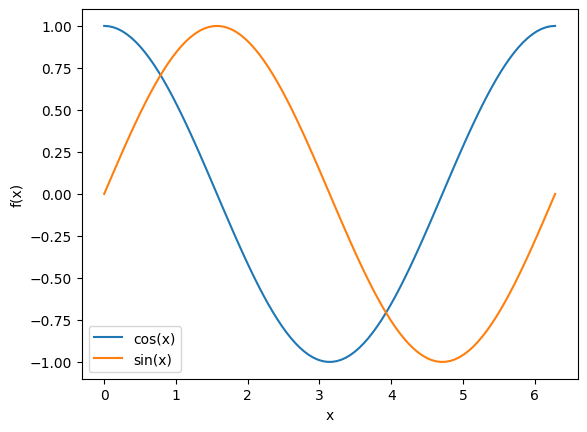

In [4]:
#Creating equally spaced grid between 0 and 2*pi
x=np.linspace(0,2*np.pi,100)
print("This is:", type(x))
y=np.cos(x)
yl=np.sin(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y,label='cos(x)')
plt.plot(x,yl,label='sin(x)')
plt.legend()
plt.show()

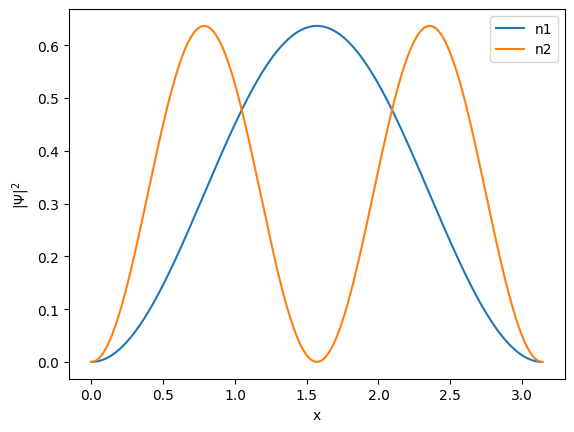

In [6]:
#plotting ptobabillity density (particle in a box)
n1= int(input("Index of the first eigen function: "))
n2= int(input("Index of the second eigen function: "))
x=np.linspace(0,np.pi,500)
#define wavefunctions
psil=np.sqrt (2/np.pi)*np.sin (n1*x)
psi2=np.sqrt (2/np.pi)*np.sin (n2*x)
plt.xlabel("x")
plt.ylabel(r"$|\Psi|^2$")
plt.plot(x,psil*psil, label="n1")
plt.plot(x,psi2*psi2, label="n2")
plt.legend()
plt.show()

In [8]:
# Particle in a box position uncertainity
import numpy as np
import scipy.integrate as scint
n= int(input(" Index of eigen fucntion: "))
x= np.linspace(0,np.pi,5000)
psi= np.sqrt (2/np.pi)* np.sin(n*x)
# Numerical integration to get <x>
expt_x= scint.trapezoid(x*psi*psi,x) 
expt_x2= scint.trapezoid(x*x*psi*psi,x)
del_x=np.sqrt(expt_x2 - expt_x**2)
print ("Position Uncertainity is:", del_x)


Position Uncertainity is: 0.8757348216603645


In [13]:
import numpy as np

x1= float(input("Enter lower bound: "))
x2= float(input("Enter upper bound: "))

nmax = 200

def f(x):
    return np.sin(x)/x if x != 0 else 1.0  # avoid nan

x = np.linspace(x1, x2, nmax)

found = False
for i in range(nmax - 1):
    prod = f(x[i]) * f(x[i+1])
    
    if prod < 0:   # sign change → root in this interval
        xval = (x[i] + x[i+1]) / 2
        print("Root at:", xval)
        found = True
        break

if not found:
    print("No sign change → no root in interval.")


Root at: 3.1381909547738696


**Particle in a Box - Wavefunctions and Uncertainties**

The wavefunctions for a particle in a one-dimensional box are given by:

- ψₙ(x) = √(2/π) sin(nx)
- ψ'ₙ(x) = n√(2/π) cos(nx)
- ψ''ₙ(x) = -n²√(2/π) sin(nx)
- Δpₙ = √(⟨p²ₙ⟩ - ⟨pₙ⟩²)

where n is the quantum number (index of the eigenfunction), x is the position, and Δpₙ represents the momentum uncertainty.

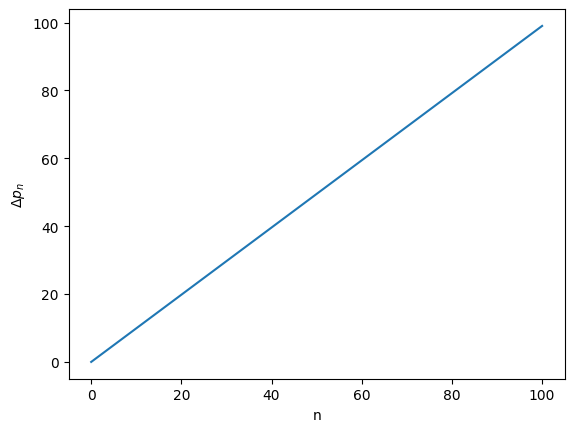

In [14]:
# Particle in a box- momentum uncertainity
import numpy as np
import scipy.integrate as scint
import matplotlib.pyplot as plt
nmax= 100
def f(n):
    x=np.linspace(0,np.pi,5000)
    psi= np.sqrt (2/np.pi)* np. sin (n*x)
    dpsi= np.sqrt(2/np.pi)* n* np.cos(n*x)
    d2psi= np.sqrt(2/np.pi)* (-n**2)* np.sin(n*x)
    expt_p_by_i = -1.0 * scint.trapezoid(psi*dpsi,x)
    expt_p2= -1.0 * scint.trapezoid(psi*d2psi,x)
    value = np.sqrt(expt_p2 + expt_p_by_i**2)
    return value

n= np.linspace(0,nmax,nmax)
del_p = np.zeros(nmax,float)
for i in range(1,nmax):
    del_p[i]= f(i)


plt.xlabel("n")
plt.ylabel(r"$\Delta p_n$")     
plt.plot(n,del_p)
plt.show()    

Wave function is superposition of m^th and n^th eigen state

Ψ(x,t) = c_m ψ_m(x) e^{-ω_m t} + c_n ψ_n(x) e^{-ω_n t}, where |c_m|^2 + |c_n|^2 = 1
Taking L = π, ψ_n(x) = √(2/π) sin(nx) & ω_n = E_n/ħ = n^2 ħ^2/(2m) = n^2 ω_1
P(x,t) = |Ψ|^2 = |c_m|^2 ψ_m^2(x) + |c_n|^2 ψ_n^2(x) + 2 c_m c_n ψ_m ψ_n cos[(m^2 − n^2) ω_1 t]


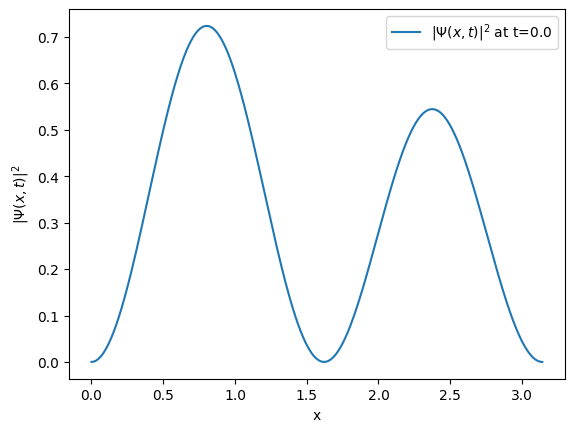

In [ ]:
# Particle in a box - time dependence 
import numpy as np
import matplotlib.pyplot as plt

m = int(input("Enter index of first eignefunction:"))
n = int(input("Enter index of second eignefunction:"))
cm = float(input("Enter the value of |c_m|^2:"))   
t = float(input("Enter time value: "))

cn = 1.0 - cm
cm = np.sqrt(cm)
cn = np.sqrt(cn)

x = np.linspace(0, np.pi, 1000)
psi_m = np.sqrt(2/np.pi) * np.sin(m * x)
psi_n = np.sqrt(2/np.pi) * np.sin(n * x)

pdensity = cm*cm * psi_m*psi_m + cn*cn * psi_n*psi_n + 2*cm*cn * psi_m*psi_n * np.cos((m*m - n*n) * t / 2)

plt.xlabel("x")
plt.ylabel(r"$|\Psi(x,t)|^2$")
plt.plot(x, pdensity, label=fr"$|\Psi(x,t)|^2$ at t={t}")
plt.legend()
plt.show()


1.6834058691446028 1.4581867844451906


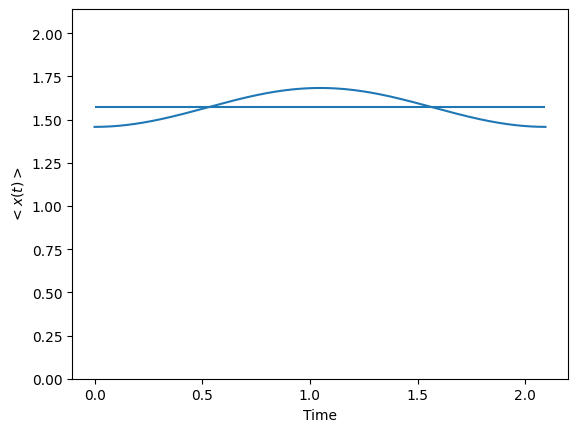

In [8]:
#Position expectation value: <x(t)>
import numpy as np
import scipy.integrate as scint 
import matplotlib.pyplot as plt

m = int(input("Enter index of first eignefunction:"))
n = int(input("Enter index of second eignefunction:"))
cm = float(input("Enter the value of |c_m|^2:"))   


cn = 1.0 - cm
cm = np.sqrt(cm)
cn = np.sqrt(cn)

x = np.linspace(0, np.pi, 1000)

def f(t1):
    psi_m = np.sqrt(2/np.pi) * np.sin(m * x)
    psi_n = np.sqrt(2/np.pi) * np.sin(n * x)
    pdensity = cm*cm * psi_m*psi_m + cn*cn * psi_n*psi_n + 2*cm*cn * psi_m*psi_n * np.cos((m*m - n*n) * t1 )
    value = scint.trapezoid(x * pdensity, x)
    return value
tmax =2.0*np.pi /3.0
t=np.linspace(0,tmax,1000)
expt_x_t = np.zeros(1000,float)
for i in range(1000):
    expt_x_t[i] = f(tmax *i/1000)

print(max(expt_x_t),min(expt_x_t))
plt.xlabel("Time")
plt.ylabel(r"$<x(t)>$")
plt.ylim(0,2.14)
plt.plot(t,expt_x_t)
plt.hlines(np.pi/2,0,tmax) 
plt.show()   

• TISE:  -1/2 d²ψ/dx² + 1/2 x̃² ψ = Ê ψ, where x̃ = √(mω/ħ) x and Ê = E / ħω

• Energy eigenvalues: Êₙ = (n + 1/2)

• Eigenfunctions: ψₙ(x̃) ~ Hₙ(x̃) e^{-x̃²/2}

• Classically particle can not exist in region where Êₙ less than 1/2 x̃²

• For n = 0, classically allowed region -1 ≤ x̃ ≤ 1

• For n = 1, classically allowed region -√3 ≤ x̃ ≤ √3

• For n = 2, classically allowed region -√5 ≤ x̃ ≤ √5

• Quantum particle can go in classically forbidden region

• Let us find this out using a code

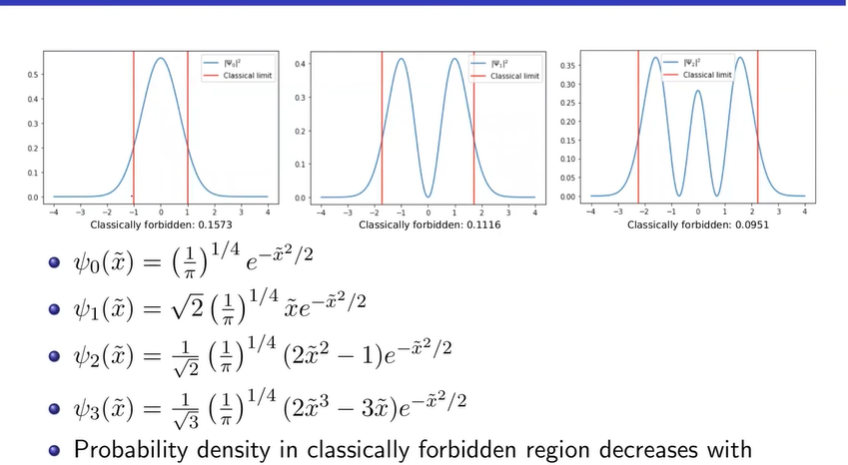

Normalization check: 0.9999999845824031
Inside classical limit: 0.8427005156570382
Outside classical limit: 0.15729948434296182


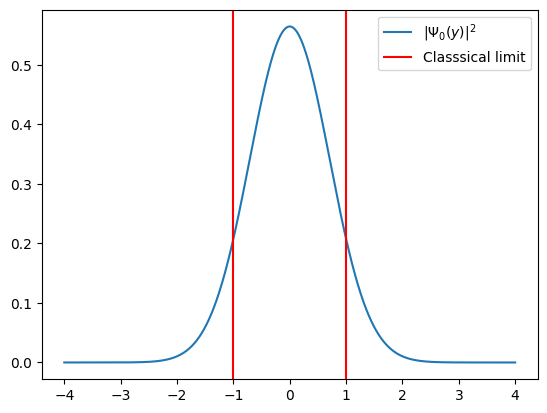

In [12]:
#Harmonic potential
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as scint
# Wavefunction and normalization check
y= np.linspace(-4,4,4000)
psiy0= np.exp(-y*y/2)/np.pi**0.25
print("Normalization check:", scint.trapezoid(psiy0*psiy0,y))
#Calculating integral within classical limits
x=np.linspace(-1,1,1000)
psix0= np.exp(-x*x/2)/np.pi**0.25
print("Inside classical limit:", scint.trapezoid(psix0*psix0,x))
print("Outside classical limit:",1- scint.trapezoid(psix0*psix0,x))
plt.plot(y,psiy0*psiy0,label=r"$|\Psi_0(y)|^2$")
plt.axvline(x=1,color='r',label="Classsical limit")
plt.axvline(x=-1,color='r')
plt.legend()
plt.show()

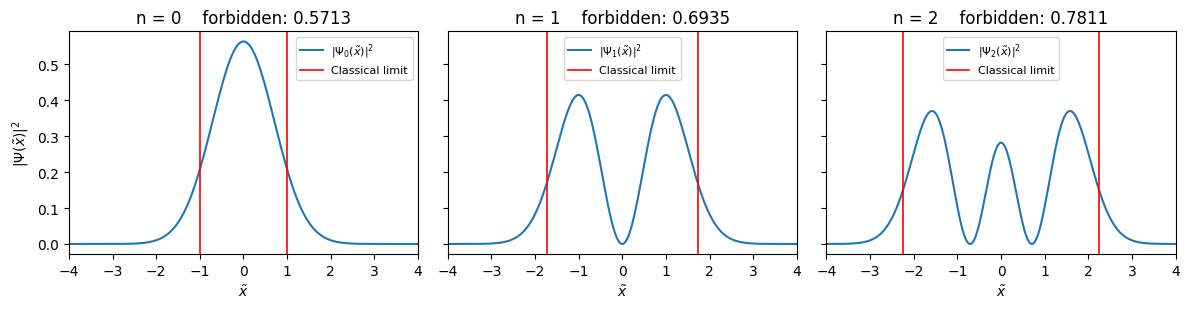

Normalization checks (integral |psi|^2 over full grid):
 n=0: integral = 1.000000
 n=1: integral = 1.000000
 n=2: integral = 1.000000
 n=3: integral = 1.000000


In [ ]:
# Harmonic oscillator: plot |psi_n(x)|^2 and classical turning points
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as scint

y = np.linspace(-6, 6, 8000)
def psi0(x):
    return (1/np.pi)**0.25 * np.exp(-x**2/2)

def psi1(x):
    return np.sqrt(2.0) * (1/np.pi)**0.25 * x * np.exp(-x**2/2)

def psi2(x):
    return (1.0/np.sqrt(2.0)) * (1/np.pi)**0.25 * (2.0*x**2 - 1.0) * np.exp(-x**2/2)

def psi3(x):
    return (1.0/np.sqrt(3.0)) * (1/np.pi)**0.25 * (2.0*x**3 - 3.0*x) * np.exp(-x**2/2)

states = [0, 1, 2] 
psi_funcs = {0: psi0, 1: psi1, 2: psi2, 3: psi3}
fig, axes = plt.subplots(1, len(states), figsize=(4*len(states), 3.2), sharey=True)

for ax, n in zip(axes.flatten(), states):
    psi = psi_funcs[n](y)
    pd = np.abs(psi)**2
    E_n = n + 0.5
    x_tp = np.sqrt(2.0 * E_n)
    mask_outside = (y < -x_tp) | (y > x_tp)
    prob_outside = scint.trapezoid(pd[mask_outside], y[mask_outside])

    ax.plot(y, pd, label=fr"$|\Psi_{n}(\tilde{{x}})|^2$")
    ax.axvline(x=x_tp, color='r', linewidth=1.2, label="Classical limit")
    ax.axvline(x=-x_tp, color='r', linewidth=1.2)
    ax.set_xlim(-4, 4)
    ax.set_xlabel(r"$\tilde{x}$")
    ax.set_title(f"n = {n}    forbidden: {prob_outside:.4f}")
    ax.grid(False)
    ax.legend(fontsize=8)

axes[0].set_ylabel(r"$|\Psi(\tilde{x})|^2$")
plt.tight_layout()
plt.show()

print("Normalization checks (integral |psi|^2 over full grid):")
for n in [0,1,2,3]:
    val = scint.trapezoid(np.abs(psi_funcs[n](y))**2, y)
    print(f" n={n}: integral = {val:.6f}")


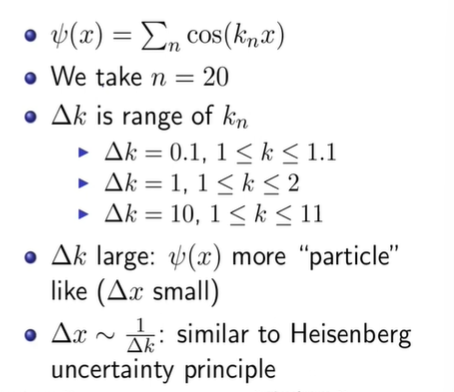

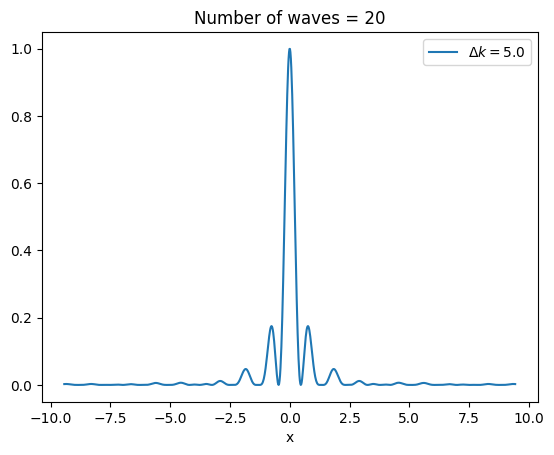

In [3]:
#Wave packet
import numpy as np
import matplotlib.pyplot as plt

nmax = int(input("Enter number of waves: "))
kmax = float(input("Enter range of k: "))

dk = kmax / nmax
ng = 1000
x = np.linspace(-3*np.pi, 3*np.pi, ng)
wp = np.zeros(ng)

for i in range(nmax):
    k = 1.0 + i * dk
    wp += np.cos(k * x) / nmax

# plotting
plt.title(f"Number of waves = {nmax}")
plt.xlabel("x")
# plt.plot(x, wp, label="Wave packet")
plt.plot(x, wp**2, label=fr"$\Delta k = {kmax}$")
plt.legend()
plt.show()


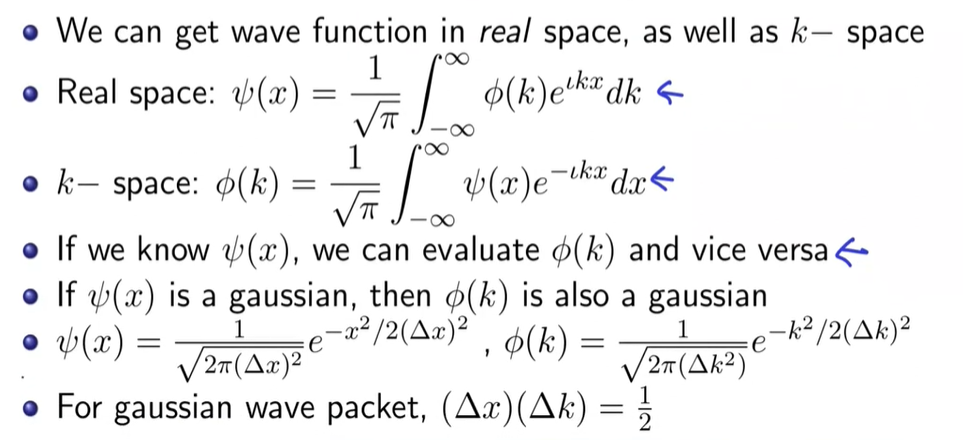

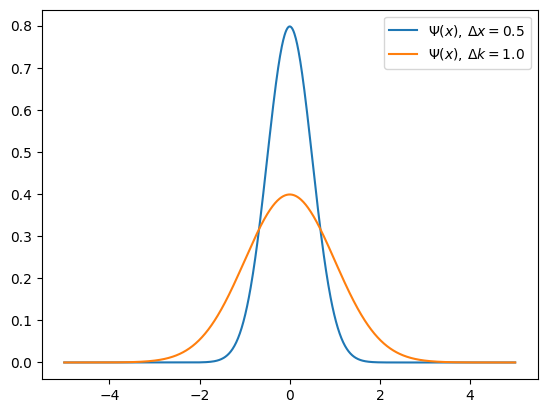

In [8]:
import numpy as np
import matplotlib.pyplot as plt
dx= float (input("Enter value of dx:"))
dk= 0.5/dx
ng=1000
x= np.linspace(-5,5,ng)
k= np.linspace(-5,5,ng)
psi_x=np.exp(-x*x/(2.0*dx*dx))/np.sqrt(2.0*np.pi*dx*dx)
psi_k=np.exp(-k*k/(2.0*dk*dk))/np.sqrt(2.0*np.pi*dk*dk)
plt.plot(x, psi_x, label=r"$\Psi(x),\, \Delta x = {}$".format(dx))
plt.plot(k, psi_k, label=r"$\Psi(x),\, \Delta k = {}$".format(dk))
plt.legend()
plt.show()

